In [85]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from tqdm import tqdm
from utils import TimeseriesDataset
from model import nts_RNN, train_model

In [86]:
def run_training(dataset_name, seq_len, batch_size, learning_rate, hidden_size, weight_decay, save_model, model_save_name):
    # seq_len = 10
    train_dataset = TimeseriesDataset(dataset_name, seq_len)
    train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
    model = nts_RNN(hidden_size)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    num_epoch = 1000
    loss_log = np.zeros(num_epoch)
    for epoch_id in tqdm(range(num_epoch)):
        loss_log[epoch_id] = train_model(train_loader, model, loss_function, optimizer)
        if epoch_id % 100 == 0 or epoch_id == num_epoch-1:
            print(f"Epoch {epoch_id}, loss: {loss_log[epoch_id]}\n-----------")

    if save_model == True:
        torch.save(model.state_dict(), "trained_models/"+model_save_name)
    return model, loss_log

In [87]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [16], 0, True, "L1_16_S10_B50_LR1e3_NR.pt")

  0%|          | 2/1000 [00:00<02:37,  6.33it/s]

Epoch 0, loss: 0.3629172791491498
-----------


 10%|█         | 102/1000 [00:17<02:29,  6.00it/s]

Epoch 100, loss: 0.028474279669123692
-----------


 20%|██        | 202/1000 [00:32<01:55,  6.91it/s]

Epoch 200, loss: 0.014285973314154933
-----------


 30%|███       | 302/1000 [00:47<01:43,  6.77it/s]

Epoch 300, loss: 0.00900757946790411
-----------


 40%|████      | 402/1000 [01:01<01:24,  7.10it/s]

Epoch 400, loss: 0.007356975071521087
-----------


 50%|█████     | 502/1000 [01:16<01:13,  6.76it/s]

Epoch 500, loss: 0.007011719828389667
-----------


 60%|██████    | 602/1000 [01:31<00:56,  7.10it/s]

Epoch 600, loss: 0.006195380988244254
-----------


 70%|███████   | 702/1000 [01:46<00:42,  7.06it/s]

Epoch 700, loss: 0.005794363538990472
-----------


 80%|████████  | 802/1000 [02:00<00:26,  7.42it/s]

Epoch 800, loss: 0.005832042174086303
-----------


 90%|█████████ | 902/1000 [02:15<00:15,  6.51it/s]

Epoch 900, loss: 0.005462952329173356
-----------


100%|██████████| 1000/1000 [02:28<00:00,  6.72it/s]

Epoch 999, loss: 0.004874320246616972
-----------


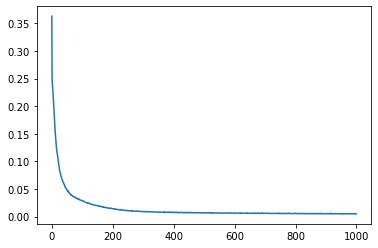

In [88]:
plt.figure()
plt.plot(range(1000), loss_log)
# plt.xlim([100, 200])

  0%|          | 2/1000 [00:00<02:16,  7.33it/s]

Epoch 0, loss: 0.4402076359633561
-----------


 10%|█         | 102/1000 [00:13<02:11,  6.84it/s]

Epoch 100, loss: 0.04395132921226732
-----------


 20%|██        | 202/1000 [00:27<01:42,  7.82it/s]

Epoch 200, loss: 0.03292693112782397
-----------


 30%|███       | 302/1000 [00:41<01:44,  6.68it/s]

Epoch 300, loss: 0.028835772485523433
-----------


 40%|████      | 402/1000 [00:54<01:23,  7.19it/s]

Epoch 400, loss: 0.024781285380883204
-----------


 50%|█████     | 502/1000 [01:09<01:12,  6.91it/s]

Epoch 500, loss: 0.023987147598885573
-----------


 60%|██████    | 602/1000 [01:23<00:54,  7.26it/s]

Epoch 600, loss: 0.022840951026959735
-----------


 70%|███████   | 702/1000 [01:38<00:42,  7.06it/s]

Epoch 700, loss: 0.0223486903072386
-----------


 80%|████████  | 802/1000 [01:53<00:46,  4.26it/s]

Epoch 800, loss: 0.02110931804342257
-----------


 90%|█████████ | 902/1000 [02:08<00:14,  6.93it/s]

Epoch 900, loss: 0.020553342729377058
-----------


100%|██████████| 1000/1000 [02:22<00:00,  7.02it/s]

Epoch 999, loss: 0.056888581529914675
-----------


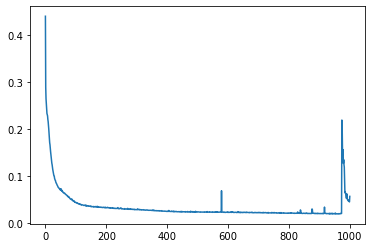

In [89]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [8], 0, True, "L1_8_S10_B50_LR1e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:36,  6.39it/s]

Epoch 0, loss: 0.3759261461404654
-----------


 10%|█         | 102/1000 [00:15<02:15,  6.65it/s]

Epoch 100, loss: 0.02643431121340165
-----------


 20%|██        | 202/1000 [00:30<01:59,  6.69it/s]

Epoch 200, loss: 0.013471882815912857
-----------


 30%|███       | 302/1000 [00:45<02:01,  5.73it/s]

Epoch 300, loss: 0.008553255658985659
-----------


 40%|████      | 402/1000 [01:01<01:28,  6.74it/s]

Epoch 400, loss: 0.007002927841373034
-----------


 50%|█████     | 502/1000 [01:17<01:16,  6.53it/s]

Epoch 500, loss: 0.00619578570675023
-----------


 60%|██████    | 602/1000 [01:32<01:01,  6.44it/s]

Epoch 600, loss: 0.005576347067419972
-----------


 70%|███████   | 702/1000 [01:46<00:43,  6.82it/s]

Epoch 700, loss: 0.005210386401113982
-----------


 80%|████████  | 802/1000 [02:01<00:28,  6.84it/s]

Epoch 800, loss: 0.005178621756475787
-----------


 90%|█████████ | 902/1000 [02:15<00:15,  6.29it/s]

Epoch 900, loss: 0.004571456977698419
-----------


100%|██████████| 1000/1000 [02:30<00:00,  6.66it/s]

Epoch 999, loss: 0.004517184711153527
-----------


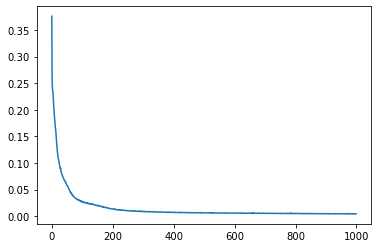

In [90]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [16], 0, True, "L1_16_S10_B50_LR1e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:32,  6.55it/s]

Epoch 0, loss: 0.2926862950508411
-----------


 10%|█         | 102/1000 [00:16<02:06,  7.12it/s]

Epoch 100, loss: 0.007916295632290153
-----------


 20%|██        | 202/1000 [00:30<01:53,  7.06it/s]

Epoch 200, loss: 0.00334498709628031
-----------


 30%|███       | 302/1000 [00:45<01:42,  6.83it/s]

Epoch 300, loss: 0.0023578447417693807
-----------


 40%|████      | 402/1000 [00:59<01:23,  7.15it/s]

Epoch 400, loss: 0.0017240195945135554
-----------


 50%|█████     | 502/1000 [01:13<01:09,  7.12it/s]

Epoch 500, loss: 0.0012283463883060184
-----------


 60%|██████    | 602/1000 [01:29<01:49,  3.64it/s]

Epoch 600, loss: 0.0010406249055669612
-----------


 70%|███████   | 702/1000 [01:45<00:44,  6.68it/s]

Epoch 700, loss: 0.001069262529439344
-----------


 80%|████████  | 802/1000 [01:59<00:28,  7.06it/s]

Epoch 800, loss: 0.0008156757419903322
-----------


 90%|█████████ | 902/1000 [02:14<00:14,  6.95it/s]

Epoch 900, loss: 0.000714317213610879
-----------


100%|██████████| 1000/1000 [02:31<00:00,  6.59it/s]

Epoch 999, loss: 0.0006369157864745441
-----------


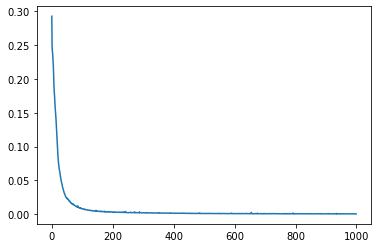

In [91]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [32], 0, True, "L1_32_S10_B50_LR1e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 1/1000 [00:02<44:48,  2.69s/it]

Epoch 0, loss: 0.2827962807246617
-----------


 10%|█         | 101/1000 [01:09<09:38,  1.55it/s]

Epoch 100, loss: 0.0056125680189375035
-----------


 20%|██        | 201/1000 [02:18<08:35,  1.55it/s]

Epoch 200, loss: 0.001615639437619433
-----------


 30%|███       | 301/1000 [03:21<07:22,  1.58it/s]

Epoch 300, loss: 0.0008884750963521323
-----------


 40%|████      | 401/1000 [04:25<06:11,  1.61it/s]

Epoch 400, loss: 0.0008588134810702036
-----------


 50%|█████     | 501/1000 [05:31<05:15,  1.58it/s]

Epoch 500, loss: 0.000557379994591299
-----------


 60%|██████    | 601/1000 [06:41<04:07,  1.61it/s]

Epoch 600, loss: 0.0006455910557773537
-----------


 70%|███████   | 701/1000 [07:53<03:05,  1.61it/s]

Epoch 700, loss: 0.0005040249542926776
-----------


 80%|████████  | 801/1000 [09:03<01:59,  1.67it/s]

Epoch 800, loss: 0.0004240287629987246
-----------


 90%|█████████ | 901/1000 [10:13<01:07,  1.46it/s]

Epoch 900, loss: 0.00024103948541508814
-----------


100%|██████████| 1000/1000 [11:20<00:00,  1.47it/s]

Epoch 999, loss: 0.00014105218864502743
-----------


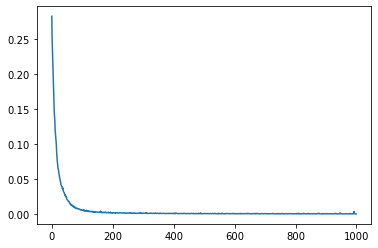

In [92]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [64], 0, True, "L1_64_S10_B50_LR1e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:29,  6.69it/s]

Epoch 0, loss: 0.46155185981111213
-----------


 10%|█         | 102/1000 [00:13<01:58,  7.61it/s]

Epoch 100, loss: 0.05282839837965075
-----------


 20%|██        | 202/1000 [00:26<01:44,  7.63it/s]

Epoch 200, loss: 0.03108256414614536
-----------


 30%|███       | 302/1000 [00:40<01:31,  7.66it/s]

Epoch 300, loss: 0.024084787892566604
-----------


 40%|████      | 402/1000 [00:55<02:13,  4.48it/s]

Epoch 400, loss: 0.020963466644368985
-----------


 50%|█████     | 502/1000 [01:11<03:09,  2.62it/s]

Epoch 500, loss: 0.01885760245988002
-----------


 60%|██████    | 602/1000 [01:25<00:52,  7.63it/s]

Epoch 600, loss: 0.017309283812090265
-----------


 70%|███████   | 702/1000 [01:38<00:38,  7.73it/s]

Epoch 700, loss: 0.015814458585477302
-----------


 80%|████████  | 802/1000 [01:51<00:25,  7.71it/s]

Epoch 800, loss: 0.014874624861097271
-----------


 90%|█████████ | 902/1000 [02:04<00:13,  7.41it/s]

Epoch 900, loss: 0.01404824857037146
-----------


100%|██████████| 1000/1000 [02:17<00:00,  7.27it/s]

Epoch 999, loss: 0.013573257594144197
-----------


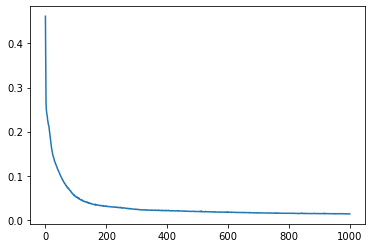

In [93]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [8], 1e-4, True, "L1_8_S10_B50_LR1e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:28,  6.73it/s]

Epoch 0, loss: 0.339959958752433
-----------


 10%|█         | 102/1000 [00:13<01:58,  7.60it/s]

Epoch 100, loss: 0.021417874172534587
-----------


 20%|██        | 202/1000 [00:27<01:46,  7.46it/s]

Epoch 200, loss: 0.009093244933615347
-----------


 30%|███       | 302/1000 [00:41<02:54,  3.99it/s]

Epoch 300, loss: 0.007095889630983327
-----------


 40%|████      | 402/1000 [00:57<01:23,  7.14it/s]

Epoch 400, loss: 0.005789401926609411
-----------


 50%|█████     | 502/1000 [01:10<01:07,  7.36it/s]

Epoch 500, loss: 0.004882756276516714
-----------


 60%|██████    | 602/1000 [01:24<00:52,  7.56it/s]

Epoch 600, loss: 0.004193454563801924
-----------


 70%|███████   | 702/1000 [01:38<00:40,  7.28it/s]

Epoch 700, loss: 0.003944046316914015
-----------


 80%|████████  | 802/1000 [01:53<00:26,  7.53it/s]

Epoch 800, loss: 0.0036455748390385903
-----------


 90%|█████████ | 902/1000 [02:07<00:13,  7.26it/s]

Epoch 900, loss: 0.003625414996269763
-----------


100%|██████████| 1000/1000 [02:20<00:00,  7.13it/s]

Epoch 999, loss: 0.0032072251446412076
-----------


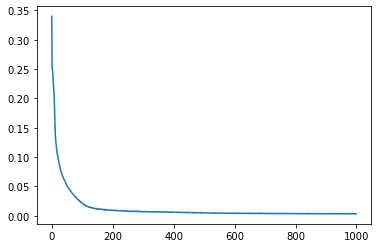

In [94]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [16], 1e-4, True, "L1_16_S10_B50_LR1e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:25,  6.84it/s]

Epoch 0, loss: 0.29019420929662476
-----------


 10%|█         | 102/1000 [00:14<02:06,  7.10it/s]

Epoch 100, loss: 0.008516251063486049
-----------


 20%|██        | 202/1000 [00:29<02:00,  6.64it/s]

Epoch 200, loss: 0.004069969898529842
-----------


 30%|███       | 302/1000 [00:44<01:37,  7.14it/s]

Epoch 300, loss: 0.0029127763950132896
-----------


 40%|████      | 402/1000 [00:59<01:23,  7.13it/s]

Epoch 400, loss: 0.0025660680647898505
-----------


 50%|█████     | 502/1000 [01:13<01:09,  7.12it/s]

Epoch 500, loss: 0.001994650137411164
-----------


 60%|██████    | 602/1000 [01:28<00:56,  7.10it/s]

Epoch 600, loss: 0.0018201942072594718
-----------


 70%|███████   | 702/1000 [01:42<00:41,  7.14it/s]

Epoch 700, loss: 0.001971646990488887
-----------


 80%|████████  | 802/1000 [01:57<00:29,  6.82it/s]

Epoch 800, loss: 0.0018024534661230723
-----------


 90%|█████████ | 902/1000 [02:12<00:15,  6.15it/s]

Epoch 900, loss: 0.0015882972652184685
-----------


100%|██████████| 1000/1000 [02:27<00:00,  6.77it/s]

Epoch 999, loss: 0.0014596525067975233
-----------


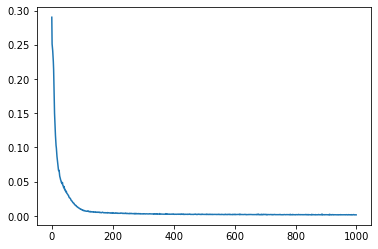

In [95]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [32], 1e-4, True, "L1_32_S10_B50_LR1e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 1/1000 [00:00<12:24,  1.34it/s]

Epoch 0, loss: 0.2914213615131902
-----------


 10%|█         | 101/1000 [01:01<08:49,  1.70it/s]

Epoch 100, loss: 0.005681621439110201
-----------


 20%|██        | 201/1000 [02:01<07:57,  1.67it/s]

Epoch 200, loss: 0.0024422190566598385
-----------


 30%|███       | 301/1000 [03:05<08:54,  1.31it/s]

Epoch 300, loss: 0.001919920317659789
-----------


 40%|████      | 401/1000 [04:07<05:52,  1.70it/s]

Epoch 400, loss: 0.0016801930051859838
-----------


 50%|█████     | 501/1000 [05:07<04:48,  1.73it/s]

Epoch 500, loss: 0.001466786926727394
-----------


 60%|██████    | 601/1000 [06:08<03:52,  1.71it/s]

Epoch 600, loss: 0.001793866865797439
-----------


 70%|███████   | 701/1000 [07:18<03:31,  1.41it/s]

Epoch 700, loss: 0.0014828940716592575
-----------


 80%|████████  | 801/1000 [08:17<01:53,  1.75it/s]

Epoch 800, loss: 0.001385765225027821
-----------


 90%|█████████ | 901/1000 [09:15<00:57,  1.73it/s]

Epoch 900, loss: 0.0018599851921732938
-----------


100%|██████████| 1000/1000 [10:19<00:00,  1.61it/s]

Epoch 999, loss: 0.001578136431027695
-----------


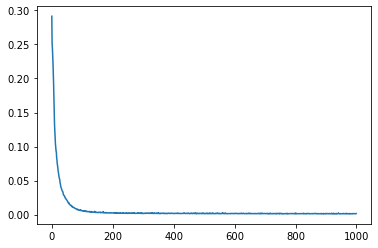

In [96]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [64], 1e-4, True, "L1_64_S10_B50_LR1e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)

  0%|          | 2/1000 [00:00<02:49,  5.88it/s]

Epoch 0, loss: 0.44089135953358244
-----------


 10%|█         | 102/1000 [00:17<02:29,  6.01it/s]

Epoch 100, loss: 0.031447884401531664
-----------


 20%|██        | 202/1000 [00:34<02:15,  5.90it/s]

Epoch 200, loss: 0.012040151759040552
-----------


 30%|███       | 302/1000 [00:51<01:56,  5.99it/s]

Epoch 300, loss: 0.008680832339450717
-----------


 40%|████      | 401/1000 [01:08<01:39,  6.03it/s]

Epoch 400, loss: 0.007631798251787876
-----------


 50%|█████     | 502/1000 [01:25<01:23,  5.97it/s]

Epoch 500, loss: 0.007260416654849445
-----------


 60%|██████    | 601/1000 [01:43<01:30,  4.39it/s]

Epoch 600, loss: 0.007875453394192915
-----------


 70%|███████   | 702/1000 [02:01<00:53,  5.57it/s]

Epoch 700, loss: 0.006279968060450731
-----------


 80%|████████  | 802/1000 [02:19<00:33,  5.93it/s]

Epoch 800, loss: 0.005169341418697693
-----------


 90%|█████████ | 902/1000 [02:36<00:16,  5.93it/s]

Epoch 900, loss: 0.005131464278847388
-----------


100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]

Epoch 999, loss: 0.0047377151754367484
-----------


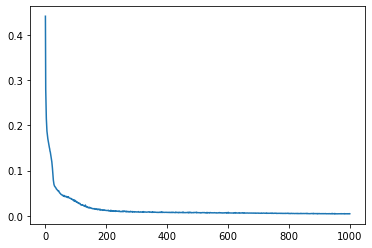

In [97]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 1e-3, [8, 7, 6], 1e-4, True, "L3_S10_B50_LR1e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)